## Import the relevant libraries

In [10]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA
import seaborn as sns
sns.set()

## Data

In [14]:
data = pd.read_csv('nn.csv')

In [17]:
data.describe()

,Inflation_rate,Unemployment_rate
count,60.000000,60.000000
mean,1.764667,4.981667
std,0.616434,2.271898
min,0.120000,3.500000
25%,1.367500,3.800000
50%,1.800000,4.250000
75%,2.202500,4.900000
max,2.950000,14.800000


In [18]:
type(data)

pandas.core.frame.DataFrame

In [19]:
in_r=data['Inflation_rate']
un_r=data['Unemployment_rate']

In [26]:
series_value_in=in_r.values
series_value_un=un_r.values

In [27]:
series_value_in

array([1.37, 1.02, 0.85, 1.13, 1.02, 1.  , 0.83, 1.06, 1.46, 1.64, 1.69,
       2.07, 2.5 , 2.74, 2.38, 2.2 , 1.87, 1.63, 1.73, 1.94, 2.23, 2.04,
       2.2 , 2.11, 2.07, 2.21, 2.36, 2.46, 2.08, 2.87, 2.95, 2.7 , 2.28,
       2.52, 2.18, 1.91, 1.55, 1.52, 1.86, 2.  , 1.79, 1.65, 1.81, 1.75,
       1.71, 1.76, 2.05, 2.29, 2.49, 2.33, 1.54, 0.33, 0.12, 0.65, 0.99,
       1.31, 1.37, 1.18, 1.17, 1.36])

In [28]:
series_value_un

array([ 4.8,  4.9,  5. ,  5.1,  4.8,  4.9,  4.8,  4.9,  5. ,  4.9,  4.7,
        4.7,  4.7,  4.6,  4.4,  4.5,  4.4,  4.3,  4.3,  4.4,  4.2,  4.1,
        4.2,  4.1,  4. ,  4.1,  4. ,  4. ,  3.8,  4. ,  3.8,  3.8,  3.7,
        3.8,  3.8,  3.9,  4. ,  3.8,  3.8,  3.7,  3.7,  3.6,  3.6,  3.7,
        3.5,  3.6,  3.6,  3.6,  3.5,  3.5,  4.4, 14.8, 13.3, 11.1, 10.2,
        8.4,  7.8,  6.9,  6.7,  6.7])

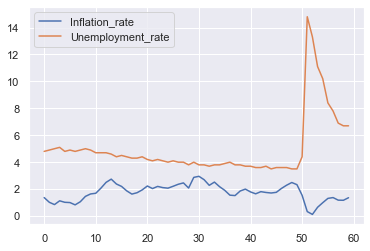

In [29]:
data.plot()


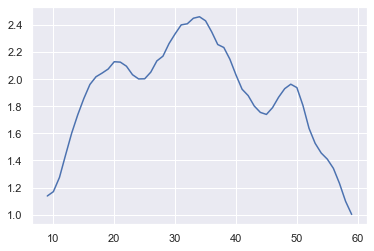

In [30]:
inflation_mean=in_r.rolling(window=10).mean()
inflation_mean.plot()

In [35]:
value_in=pd.DataFrame(series_value_in)

In [36]:
value_un=pd.DataFrame(series_value_un)

In [39]:
in_data=pd.concat([value_in,value_in.shift(1)], axis=1)
in_data

,0,0
0,1.37,NaN
1,1.02,1.37
2,0.85,1.02
3,1.13,0.85
4,1.02,1.13
5,1.00,1.02
6,0.83,1.00
7,1.06,0.83
8,1.46,1.06
9,1.64,1.46


In [40]:
un_data=pd.concat([value_un,value_un.shift(1)], axis=1)
un_data

,0,0
0,4.8,NaN
1,4.9,4.8
2,5.0,4.9
3,5.1,5.0
4,4.8,5.1
5,4.9,4.8
6,4.8,4.9
7,4.9,4.8
8,5.0,4.9
9,4.9,5.0


In [42]:
in_data.columns=['Actual_inflation','Forecast_inflation']

In [43]:
un_data.columns=['Actual_unemployment', 'Forecast_unemployment']

In [44]:
in_data

,Actual_inflation,Forecast_inflation
0,1.37,NaN
1,1.02,1.37
2,0.85,1.02
3,1.13,0.85
4,1.02,1.13
5,1.00,1.02
6,0.83,1.00
7,1.06,0.83
8,1.46,1.06
9,1.64,1.46


In [45]:
un_data

,Actual_unemployment,Forecast_unemployment
0,4.8,NaN
1,4.9,4.8
2,5.0,4.9
3,5.1,5.0
4,4.8,5.1
5,4.9,4.8
6,4.8,4.9
7,4.9,4.8
8,5.0,4.9
9,4.9,5.0


In [47]:
data_test_in=in_data[1:]
data_test_un=un_data[1:]

In [48]:
from sklearn.metrics import mean_squared_error

In [49]:
inf_error=mean_squared_error(data_test_in.Actual_inflation,data_test_in.Forecast_inflation)
une_error=mean_squared_error(data_test_un.Actual_unemployment,data_test_un.Forecast_unemployment)

In [50]:
inf_error

0.10225593220338985

In [51]:
une_error

2.067966101694916

In [52]:
np.sqrt(inf_error)

0.31977481483598713

In [53]:
np.sqrt(une_error)

1.4380424547609558

## ARIMA


In [54]:
# Autoregresive(p) Integrated (d) Movingavarage(q)

In [55]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

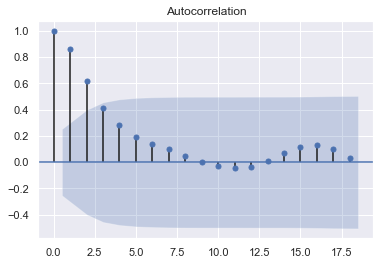

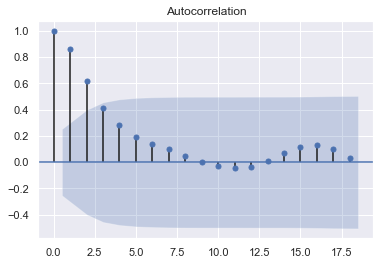

In [56]:
# plot_acf is to identify parameter of Q
# ARIMA(p,d,q)

plot_acf(in_r)

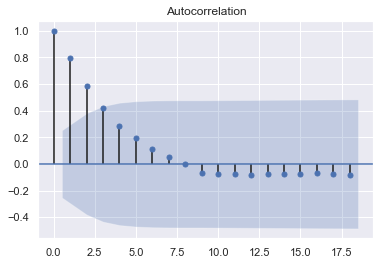

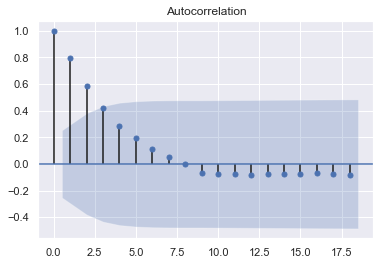

In [57]:
plot_acf(un_r)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


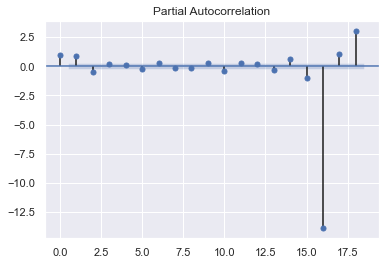

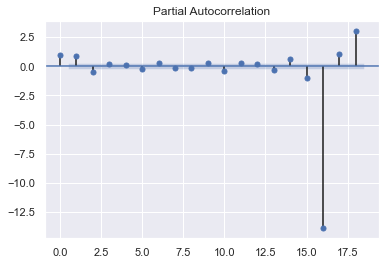

In [58]:
plot_pacf(in_r) # value of p

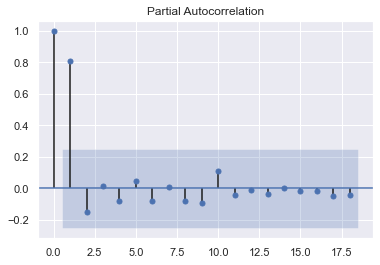

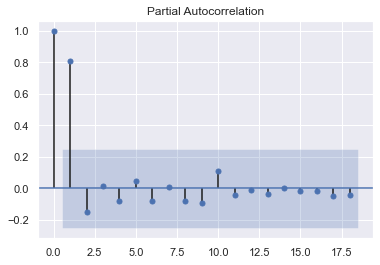

In [59]:
plot_pacf(un_r)

In [60]:
data['Inflation_rate'].size

60

In [92]:
data_train_in=in_r[0:50]
data_test_in=in_r[50:60]

In [120]:
data_train_un=un_r[0:50]
data_test_un=un_r[50:60]

In [121]:
from statsmodels.tsa.arima_model import ARIMA


In [122]:
in_model=ARIMA(data_train_in, order=(3,1,3))

In [123]:
in_model_fit=in_model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


In [124]:
in_model_fit.aic

9.963342599902717

In [125]:
un_model=ARIMA(data_train_un, order=(1,1,1))

In [126]:
un_model_fit=un_model.fit()

In [127]:
un_model_fit.aic

-74.59085071620743

## Forecast

In [128]:
in_forecast=in_model_fit.forecast(steps=10)[0]

In [129]:
in_forecast

array([2.23674194, 2.21613797, 2.34318041, 2.27795035, 2.34629954,
       2.35423602, 2.36489783, 2.39672223, 2.4033723 , 2.42590544])

In [130]:
data_test_in

50    1.54
51    0.33
52    0.12
53    0.65
54    0.99
55    1.31
56    1.37
57    1.18
58    1.17
59    1.36
Name: Inflation_rate, dtype: float64

In [131]:
data_test_un

50     4.4
51    14.8
52    13.3
53    11.1
54    10.2
55     8.4
56     7.8
57     6.9
58     6.7
59     6.7
Name: Unemployment_rate, dtype: float64

In [200]:
un_forecast=un_model_fit.forecast(steps=10)[0]
un_forecast

array([3.46584772, 3.4365861 , 3.4076451 , 3.37872511, 3.3498065 ,
       3.32088799, 3.29196948, 3.26305097, 3.23413246, 3.20521395])

In [231]:
forecast_in=pd.DataFrame({'Real rate': data_test_in, 'Forecast':in_forecast})

forecast_un=pd.DataFrame({'Real rate':data_test_un, 'Forecast': un_forecast})

In [232]:
forecast_in

,Real rate,Forecast
50,1.54,2.236742
51,0.33,2.216138
52,0.12,2.343180
53,0.65,2.277950
54,0.99,2.346300
55,1.31,2.354236
56,1.37,2.364898
57,1.18,2.396722
58,1.17,2.403372
59,1.36,2.425905


In [233]:
in_data=pd.concat([in_r, forecast_in], axis=1)
in_data

,Inflation_rate,Real rate,Forecast
0,1.37,NaN,NaN
1,1.02,NaN,NaN
2,0.85,NaN,NaN
3,1.13,NaN,NaN
4,1.02,NaN,NaN
5,1.00,NaN,NaN
6,0.83,NaN,NaN
7,1.06,NaN,NaN
8,1.46,NaN,NaN
9,1.64,NaN,NaN


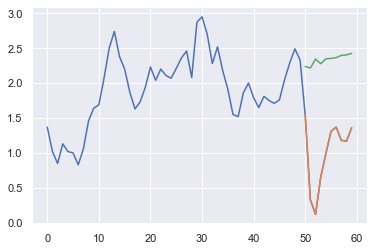

In [234]:
plt.plot(in_data)

In [235]:
forecast_un


,Real rate,Forecast
50,4.4,3.465848
51,14.8,3.436586
52,13.3,3.407645
53,11.1,3.378725
54,10.2,3.349807
55,8.4,3.320888
56,7.8,3.291969
57,6.9,3.263051
58,6.7,3.234132
59,6.7,3.205214


In [237]:
un_data=pd.concat([un_r, forecast_un], axis=1)
un_data

,Unemployment_rate,Real rate,Forecast
0,4.8,NaN,NaN
1,4.9,NaN,NaN
2,5.0,NaN,NaN
3,5.1,NaN,NaN
4,4.8,NaN,NaN
5,4.9,NaN,NaN
6,4.8,NaN,NaN
7,4.9,NaN,NaN
8,5.0,NaN,NaN
9,4.9,NaN,NaN


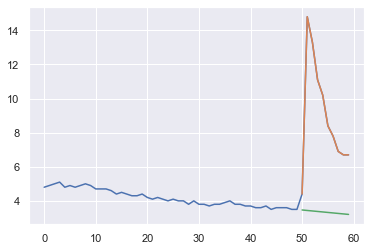

In [238]:
plt.plot(un_data)

In [239]:
np.sqrt(mean_squared_error(data_test_in,in_forecast))

1.4033279330902562

In [241]:
np.sqrt(mean_squared_error(data_test_un,un_forecast))

6.46509568371221

## Test

In [242]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests

In [249]:
result_in=adfuller(data['Inflation_rate'])

In [252]:
print(f'test statistics:{result_in[0]}')
print(f'p-value:{result_in[0]}')
print(f'critical values:{result_in[4]}')

test statistics:-3.257441856345268
p-value:-3.257441856345268
critical values:{'1%': -3.548493559596539, '5%': -2.912836594776334, '10%': -2.594129155766944}


In [251]:
result_un=adfuller(data['Unemployment_rate'])

In [253]:
print(f'test statistics:{result_un[0]}')
print(f'p-value:{result_un[0]}')
print(f'critical values:{result_un[4]}')

test statistics:-2.463786105197643
p-value:-2.463786105197643
critical values:{'1%': -3.5463945337644063, '5%': -2.911939409384601, '10%': -2.5936515282964665}


In [254]:
max_lags=1

In [255]:
results=grangercausalitytests(data[['Inflation_rate','Unemployment_rate']], max_lags, verbose=False)

In [247]:
results

{1: ({'ssr_ftest': (0.0007525065027752237, 0.978212819038139, 56.0, 1),
   'ssr_chi2test': (0.0007928193511381822, 0.9775368943729621, 1),
   'lrtest': (0.0007928140244075621, 0.9775369698147984, 1),
   'params_ftest': (0.0007525065027785187, 0.978212819038139, 56.0, 1.0)},
   array([[0., 1., 0.]])])}

In [248]:
p_values=[round(results[i+1][0]['ssr_ftest'][1],4) for i in range (max_lags)]
p_values

[0.9782]